In [1]:
import pandas as pd

In [2]:
agg_session = pd.read_csv('../files/agg_data.agg_session.csv', index_col=0).drop(columns=['event_date', 'process_date', 'app_bundle_id'])
agg_session = agg_session[(agg_session['install_datetime'] >= '2022-02-01') & (agg_session['install_datetime'] < '2022-03-01')]
agg_session = agg_session.sort_values(['install_datetime', 'user_id', 'start_session'])
agg_session = agg_session[agg_session['session_time'] != 0]

In [ ]:
PUBLIC_DATA = '../files/public'

In [3]:
mt_level_start = pd.read_csv(f'{PUBLIC_DATA}/prod_mt.MT_level_start.csv', index_col=0).astype({'booster_1_count': int, 'booster_2_count': int, 'booster_3_count': int})

In [4]:
mt_level_end = pd.read_csv(f'{PUBLIC_DATA}/prod_mt.MT_level_end.csv', index_col=0).fillna(0).astype({'booster_1_count': int, 'booster_2_count': int, 'booster_3_count': int})

In [5]:
mt_click_button = pd.read_csv(f'{PUBLIC_DATA}/prod_mt.MT_click_button.csv', index_col=0)

In [6]:
mt_math_exercise = pd.read_csv(f'{PUBLIC_DATA}/prod_mt.MT_math_exercise.csv', index_col=0).drop(columns=['send_age']).astype({'exercise_result': int})

In [7]:
mt_session_end = pd.read_csv(f'{PUBLIC_DATA}/prod_mt.MT_session_end.csv', index_col=0)

In [8]:
mt_show_windows = pd.read_csv(f'{PUBLIC_DATA}/prod_mt.MT_show_windows.csv', index_col=0)

# Clear data

In [9]:
target = (agg_session['user_id'] == agg_session['user_id'].shift(-1)).astype(int)
agg_session = agg_session.assign(target=target)
agg_session

,user_id,session_id,start_session,end_session,install_datetime,LT,session_time,match_count,target
46748,c657ed95d67f06eae4d11e2189d98a5f,21525269592C4CE288718B89D9E71594,2022-02-16 20:32:17+00:00,2022-02-16 20:39:33+00:00,2022-02-01 01:53:40+00:00,15,7.266667,1,1
130690,c657ed95d67f06eae4d11e2189d98a5f,B9E9C86E3C384D17A205213AFDEC5802,2022-02-17 21:08:22+00:00,2022-02-17 21:09:57+00:00,2022-02-01 01:53:40+00:00,16,1.583333,1,1
52196,c657ed95d67f06eae4d11e2189d98a5f,9C53DEE10910487C9CA9EB3FBB8D614E,2022-02-18 15:41:41+00:00,2022-02-18 15:43:14+00:00,2022-02-01 01:53:40+00:00,17,1.550000,1,1
133551,c657ed95d67f06eae4d11e2189d98a5f,89BA51D8257E4472AF4D2DE9EC8098A3,2022-02-18 15:43:51+00:00,2022-02-18 15:51:27+00:00,2022-02-01 01:53:40+00:00,17,7.600000,4,1
133550,c657ed95d67f06eae4d11e2189d98a5f,495A58E490814C3F9501ECF5273FB9B4,2022-02-18 15:52:39+00:00,2022-02-18 15:56:22+00:00,2022-02-01 01:53:40+00:00,17,3.716667,3,1
...,...,...,...,...,...,...,...,...,...
3310,c584e0ac3add8fd309fbefae31fef8e8,8C84507455654FB58B583A1128602671,2022-03-04 18:29:27+00:00,2022-03-04 18:38:05+00:00,2022-02-28 23:27:08+00:00,3,8.633333,3,1
3309,c584e0ac3add8fd309fbefae31fef8e8,CA068A4F70F945159506944F6FF45104,2022-03-04 19:17:16+00:00,2022-03-04 19:19:34+00:00,2022-02-28 23:27:08+00:00,3,2.300000,1,1
84168,c584e0ac3add8fd309fbefae31fef8e8,584D7B35019D45D0BF4BAF76B9B9EFFC,2022-03-04 21:56:26+00:00,2022-03-04 21:59:33+00:00,2022-02-28 23:27:08+00:00,3,3.116667,2,1
84170,c584e0ac3add8fd309fbefae31fef8e8,1DA9773BDA7C42C689F09ECF4954FB53,2022-03-04 22:00:53+00:00,2022-03-04 22:08:33+00:00,2022-02-28 23:27:08+00:00,3,7.666667,3,1


In [10]:
import numpy as np

def count_unique(data: pd.Series) -> int:
    return len(data.unique())

def count_zeroes(data: pd.Series) -> int:
    return np.count_nonzero(data == 0)

def count_ones(data: pd.Series) -> int:
    return np.count_nonzero(data == 1)
    

In [11]:
def default_filter(df: pd.DataFrame) -> pd.DataFrame:
    df = df[df['session_id'].isin(agg_session['session_id'])]
    df = df.drop(columns=[
        'meta_accepted_at',
        'process_date',
        'event_id',
        'event_name',
        'event_date',
        'client_version',
        'install_id',
        'app_bundle_id',
        'device_langauge',
    ], errors='ignore')
    df = df.sort_values(['user_id', 'event_datetime'])
    df = df.fillna(0)
    return df

def level_agg(df: pd.DataFrame) -> pd.DataFrame:
    df_agg = df.groupby('session_id').agg({
        'device_hw_model': ['min'],
        'platform': ['min'],
        'match_type': ['count'],
        'match_count': [count_unique],
        'moves': ['min', 'max', 'sum', 'mean', 'median'],
        'goal_1_count': ['min', 'max', 'sum', 'mean', 'median'],
        'goal_2_count': ['min', 'max', 'sum', 'mean', 'median'],
        'goal_3_count': ['min', 'max', 'sum', 'mean', 'median'],
        'goal_4_count': ['min', 'max', 'sum', 'mean', 'median'],
        'booster_1_count': ['min', 'max', 'sum', 'mean', 'median'],
        'booster_2_count': ['min', 'max', 'sum', 'mean', 'median'],
        'booster_3_count': ['min', 'max', 'sum', 'mean', 'median'],
        'is_match_Campaign': ['sum'],
        'is_match_Cycled': ['sum'],
        'is_match_Lives': ['sum'],
        'is_match_Busters': ['sum'],
        'is_match_Skills': ['sum'],
        # 'device_hw_model': ['min', 'max', 'sum', 'count', 'mean', 'median', count_unique, 'unique'],
    })

    return df_agg

def click_button_agg(df: pd.DataFrame) -> pd.DataFrame:
    df_agg = (df.drop(columns=['user_id', 'event_datetime', 'device_hw_model', 'platform', 'button_id', 'from_page'])
                .groupby('session_id')
                .agg('sum'))

    return df_agg

def math_exercise_agg(df: pd.DataFrame) -> pd.DataFrame:
    df_agg = df.groupby('session_id').agg({'exercise_result': [count_zeroes, count_ones]})
    return df_agg

def filter_agg_level_data(df: pd.DataFrame, agg_func: callable, filter_func: callable = default_filter, col_prefix: str = None,) -> pd.DataFrame:
    df = filter_func(df)
    df_agg = agg_func(df)
    if col_prefix:
        df_agg.columns = [ col_prefix + '__'.join(col) for col in df_agg.columns.to_flat_index()]
    return df_agg

In [12]:
match_types_ls = {f"is_match_{match}": (mt_level_start['match_type'] == match).astype(int) for match in mt_level_start['match_type'].unique()}
mt_level_start_agg = filter_agg_level_data(mt_level_start.assign(**match_types_ls), agg_func=level_agg,  col_prefix='ls__')
mt_level_start_agg.head()

,ls__device_hw_model__min,ls__platform__min,ls__match_type__count,ls__match_count__count_unique,ls__moves__min,ls__moves__max,ls__moves__sum,ls__moves__mean,ls__moves__median,ls__goal_1_count__min,...,ls__booster_3_count__min,ls__booster_3_count__max,ls__booster_3_count__sum,ls__booster_3_count__mean,ls__booster_3_count__median,ls__is_match_Campaign__sum,ls__is_match_Cycled__sum,ls__is_match_Lives__sum,ls__is_match_Busters__sum,ls__is_match_Skills__sum
session_id,,,,,,,,,,,,,,,,,,,,,
0002630A63434FF2B79B187D7817BE47,Xiaomi Redmi 7A,android,28,14,15,30,664,23.714286,24.0,6,...,0,0,0,0.0,0.0,28,0,0,0,0
00030C26A30843C396E335DECE31B47E,vivo vivo 1820,android,5,5,23,30,133,26.600000,27.0,1,...,0,0,0,0.0,0.0,1,0,0,4,0
0003204D3C05458C9CE39F826CB41E3D,samsung SM-A320F,android,8,1,30,30,240,30.000000,30.0,42,...,0,0,0,0.0,0.0,0,0,0,8,0
00046EF38BF245D7A984CB832362AA48,samsung SM-M127F,android,2,2,20,25,45,22.500000,22.5,15,...,0,0,0,0.0,0.0,2,0,0,0,0
0004A75547744AA187E2F7273A82C8E5,samsung SM-A525F,android,12,2,15,20,210,17.500000,17.5,6,...,0,0,0,0.0,0.0,12,0,0,0,0


In [13]:
match_types_le = {f"is_match_{match}": (mt_level_end['match_type'] == match).astype(int) for match in mt_level_end['match_type'].unique()}
mt_level_end_agg = filter_agg_level_data(mt_level_end.assign(**match_types_le), agg_func=level_agg, col_prefix='le__')
mt_level_end_agg.head()

,le__device_hw_model__min,le__platform__min,le__match_type__count,le__match_count__count_unique,le__moves__min,le__moves__max,le__moves__sum,le__moves__mean,le__moves__median,le__goal_1_count__min,...,le__booster_3_count__min,le__booster_3_count__max,le__booster_3_count__sum,le__booster_3_count__mean,le__booster_3_count__median,le__is_match_Campaign__sum,le__is_match_Cycled__sum,le__is_match_Lives__sum,le__is_match_Busters__sum,le__is_match_Skills__sum
session_id,,,,,,,,,,,,,,,,,,,,,
0000185903844FF4A4D3C076530F6A12,OPPO CPH2069,android,1,1,0.0,0.0,0.0,0.0,0.0,9,...,0,0,0,0.0,0.0,0,0,0,1,0
0002630A63434FF2B79B187D7817BE47,Xiaomi Redmi 7A,android,52,13,0.0,0.0,0.0,0.0,0.0,6,...,0,0,0,0.0,0.0,52,0,0,0,0
00030C26A30843C396E335DECE31B47E,vivo vivo 1820,android,4,4,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0.0,0.0,0,0,0,4,0
00046EF38BF245D7A984CB832362AA48,samsung SM-M127F,android,2,2,0.0,0.0,0.0,0.0,0.0,14,...,0,0,0,0.0,0.0,2,0,0,0,0
0004A75547744AA187E2F7273A82C8E5,samsung SM-A525F,android,3,1,0.0,0.0,0.0,0.0,0.0,6,...,0,0,0,0.0,0.0,3,0,0,0,0


In [14]:
button_ids = {f"is_button_{button}": (mt_click_button['button_id'] == button).astype(int) for button in mt_click_button['button_id'].unique()}
from_pages = {f"is_page_{button}": (mt_click_button['from_page'] == button).astype(int) for button in mt_click_button['from_page'].unique()}
mt_click_button_agg = filter_agg_level_data(mt_click_button.assign(**button_ids, **from_pages), agg_func=click_button_agg).add_prefix('bc__').add_suffix('__count')
mt_click_button_agg.head()

,bc__is_button_MainPlayButton__count,bc__is_button_RateApp_Star_2__count,bc__is_button_RateApp_DoRate__count,bc__is_button_RateApp_Star_5__count,bc__is_button_RateApp_Star_3__count,bc__is_button_RateApp_Star_1__count,bc__is_button_RateApp_Star_4__count,bc__is_button_Skills_PlayButton__count,bc__is_button_Lives_PlayButton__count,bc__is_button_Booster_PlayButton__count,bc__is_page_Menu__count,bc__is_page_RateApp__count,bc__is_page_BonusLocation__count
session_id,,,,,,,,,,,,,
0000185903844FF4A4D3C076530F6A12,1,0,0,0,0,0,0,0,0,0,1,0,0
0002630A63434FF2B79B187D7817BE47,20,0,0,0,0,0,0,0,0,0,20,0,0
00030C26A30843C396E335DECE31B47E,1,0,0,0,0,0,0,0,0,2,1,0,2
0003204D3C05458C9CE39F826CB41E3D,0,0,0,0,0,0,0,0,0,7,0,0,7
00046EF38BF245D7A984CB832362AA48,2,0,0,0,0,0,0,0,0,0,2,0,0


In [15]:
mt_math_exercise_agg = filter_agg_level_data(mt_math_exercise, agg_func=math_exercise_agg, col_prefix='me__')
mt_math_exercise_agg.head()

,me__exercise_result__count_zeroes,me__exercise_result__count_ones
session_id,,
0000185903844FF4A4D3C076530F6A12,0,3
0002630A63434FF2B79B187D7817BE47,2,16
00030C26A30843C396E335DECE31B47E,2,7
00046EF38BF245D7A984CB832362AA48,0,3
0006B5BC4BF5466281D29CB4F45A1230,4,11


# Unite data

In [16]:
data = pd.merge(agg_session, mt_level_start_agg, how="left", on='session_id')
data = pd.merge(data, mt_level_end_agg, how="left", on='session_id')
data = pd.merge(data, mt_click_button_agg, how="left", on='session_id')
data = pd.merge(data, mt_math_exercise_agg, how="left", on='session_id')
data

,user_id,session_id,start_session,end_session,install_datetime,LT,session_time,match_count,target,ls__device_hw_model__min,...,bc__is_button_RateApp_Star_1__count,bc__is_button_RateApp_Star_4__count,bc__is_button_Skills_PlayButton__count,bc__is_button_Lives_PlayButton__count,bc__is_button_Booster_PlayButton__count,bc__is_page_Menu__count,bc__is_page_RateApp__count,bc__is_page_BonusLocation__count,me__exercise_result__count_zeroes,me__exercise_result__count_ones
0,c657ed95d67f06eae4d11e2189d98a5f,21525269592C4CE288718B89D9E71594,2022-02-16 20:32:17+00:00,2022-02-16 20:39:33+00:00,2022-02-01 01:53:40+00:00,15,7.266667,1,1,samsung SM-G9750,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,4.0,8.0
1,c657ed95d67f06eae4d11e2189d98a5f,B9E9C86E3C384D17A205213AFDEC5802,2022-02-17 21:08:22+00:00,2022-02-17 21:09:57+00:00,2022-02-01 01:53:40+00:00,16,1.583333,1,1,samsung SM-G9750,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN
2,c657ed95d67f06eae4d11e2189d98a5f,9C53DEE10910487C9CA9EB3FBB8D614E,2022-02-18 15:41:41+00:00,2022-02-18 15:43:14+00:00,2022-02-01 01:53:40+00:00,17,1.550000,1,1,samsung SM-G9750,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,NaN,NaN
3,c657ed95d67f06eae4d11e2189d98a5f,89BA51D8257E4472AF4D2DE9EC8098A3,2022-02-18 15:43:51+00:00,2022-02-18 15:51:27+00:00,2022-02-01 01:53:40+00:00,17,7.600000,4,1,samsung SM-G9750,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,8.0,4.0,26.0
4,c657ed95d67f06eae4d11e2189d98a5f,495A58E490814C3F9501ECF5273FB9B4,2022-02-18 15:52:39+00:00,2022-02-18 15:56:22+00:00,2022-02-01 01:53:40+00:00,17,3.716667,3,1,samsung SM-G9750,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88740,c584e0ac3add8fd309fbefae31fef8e8,8C84507455654FB58B583A1128602671,2022-03-04 18:29:27+00:00,2022-03-04 18:38:05+00:00,2022-02-28 23:27:08+00:00,3,8.633333,3,1,Xiaomi Mi 9T,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,7.0
88741,c584e0ac3add8fd309fbefae31fef8e8,CA068A4F70F945159506944F6FF45104,2022-03-04 19:17:16+00:00,2022-03-04 19:19:34+00:00,2022-02-28 23:27:08+00:00,3,2.300000,1,1,Xiaomi Mi 9T,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0
88742,c584e0ac3add8fd309fbefae31fef8e8,584D7B35019D45D0BF4BAF76B9B9EFFC,2022-03-04 21:56:26+00:00,2022-03-04 21:59:33+00:00,2022-02-28 23:27:08+00:00,3,3.116667,2,1,Xiaomi Mi 9T,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0
88743,c584e0ac3add8fd309fbefae31fef8e8,1DA9773BDA7C42C689F09ECF4954FB53,2022-03-04 22:00:53+00:00,2022-03-04 22:08:33+00:00,2022-02-28 23:27:08+00:00,3,7.666667,3,1,Xiaomi Mi 9T,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0


In [17]:
data.describe()

,LT,session_time,match_count,target,ls__match_type__count,ls__match_count__count_unique,ls__moves__min,ls__moves__max,ls__moves__sum,ls__moves__mean,...,bc__is_button_RateApp_Star_1__count,bc__is_button_RateApp_Star_4__count,bc__is_button_Skills_PlayButton__count,bc__is_button_Lives_PlayButton__count,bc__is_button_Booster_PlayButton__count,bc__is_page_Menu__count,bc__is_page_RateApp__count,bc__is_page_BonusLocation__count,me__exercise_result__count_zeroes,me__exercise_result__count_ones
count,88745.000000,88745.000000,88745.000000,88745.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,74258.000000,...,69886.000000,69886.000000,69886.000000,69886.000000,69886.000000,69886.000000,69886.000000,69886.000000,48895.000000,48895.000000
mean,16.252589,9.822571,2.772900,0.936177,36.780549,4.874721,22.057583,26.167753,896.288009,24.070936,...,0.008857,0.019317,1.005523,2.944409,0.709842,17.265003,0.110680,4.659774,13.672216,38.878495
std,11.781756,14.505606,3.465362,0.244439,114.987602,5.581624,3.906057,4.025521,2841.907927,3.396525,...,0.292804,0.740704,5.738849,16.468386,5.160194,55.233181,1.988516,18.788314,62.687468,127.933493
min,0.000000,0.016667,0.000000,0.000000,1.000000,1.000000,15.000000,15.000000,15.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.450000,1.000000,1.000000,4.000000,1.000000,20.000000,23.000000,83.000000,21.857143,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,5.000000
50%,15.000000,4.933333,2.000000,1.000000,9.000000,3.000000,20.000000,27.000000,216.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,2.000000,12.000000
75%,25.000000,12.683333,3.000000,1.000000,27.000000,6.000000,25.000000,30.000000,648.000000,26.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,2.000000,7.000000,30.000000
max,46.000000,380.716667,93.000000,1.000000,2355.000000,150.000000,30.000000,30.000000,58875.000000,30.000000,...,55.000000,53.000000,226.000000,448.000000,210.000000,1371.000000,106.000000,448.000000,2229.000000,3765.000000


# Prepare dataset

In [18]:
from collections import Counter

import numpy as np
import catboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

In [19]:
SEED = 42

np.random.seed(SEED)

In [20]:
df = data.drop(columns=[
    'user_id', 'session_id', 'start_session', 'end_session', 'install_datetime', 'le__platform__min', 'le__device_hw_model__min'
])
df['ls__device_hw_model__min'].fillna('', inplace=True)
df['ls__platform__min'].fillna('', inplace=True)

In [21]:
X = df.drop(['target'], axis=1)
Y = df['target']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=SEED)

In [23]:
X_train.to_csv('../data/X_train.csv')
X_test.to_csv('../data/X_test.csv')
y_train.to_csv('../data/y_train.csv')
y_test.to_csv('../data/y_test.csv')

# Dataset info

In [24]:
for col in X.columns:
    print(col)

LT
session_time
match_count
ls__device_hw_model__min
ls__platform__min
ls__match_type__count
ls__match_count__count_unique
ls__moves__min
ls__moves__max
ls__moves__sum
ls__moves__mean
ls__moves__median
ls__goal_1_count__min
ls__goal_1_count__max
ls__goal_1_count__sum
ls__goal_1_count__mean
ls__goal_1_count__median
ls__goal_2_count__min
ls__goal_2_count__max
ls__goal_2_count__sum
ls__goal_2_count__mean
ls__goal_2_count__median
ls__goal_3_count__min
ls__goal_3_count__max
ls__goal_3_count__sum
ls__goal_3_count__mean
ls__goal_3_count__median
ls__goal_4_count__min
ls__goal_4_count__max
ls__goal_4_count__sum
ls__goal_4_count__mean
ls__goal_4_count__median
ls__booster_1_count__min
ls__booster_1_count__max
ls__booster_1_count__sum
ls__booster_1_count__mean
ls__booster_1_count__median
ls__booster_2_count__min
ls__booster_2_count__max
ls__booster_2_count__sum
ls__booster_2_count__mean
ls__booster_2_count__median
ls__booster_3_count__min
ls__booster_3_count__max
ls__booster_3_count__sum
ls__boost

In [25]:
counts = Counter(Y)

for k, v in counts.items():
    frac = int(round(v / len(Y) * 100, 0))
    print(f"{k}: {v} - {frac}%")

1: 83081 - 94%
0: 5664 - 6%


In [26]:
print(f"TOTAL: {len(X)}")
print(f"TRAIN: {len(X_train)}")
print(f"TEST: {len(X_test)}")

TOTAL: 88745
TRAIN: 62121
TEST: 26624


# Model training

In [27]:
cat_features = ['ls__device_hw_model__min', 'ls__platform__min']
train_pool = catboost.Pool(X_train, y_train, cat_features=cat_features)
test_pool = catboost.Pool(X_test, y_test, cat_features=cat_features)

In [28]:
model = catboost.CatBoostClassifier(
                                    learning_rate=1e-2,
                                    iterations=1500,
                                    random_seed=SEED,
                                    loss_function='Logloss',
                                    auto_class_weights='Balanced',
                                    verbose=True,
                                    custom_metric=['Accuracy', 'AUC'])

In [29]:
model.fit(train_pool, eval_set=test_pool, plot=True, silent=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Model quality exploration

In [30]:
round(roc_auc_score(y_test, model.predict(X_test)), 4)

0.7023

In [31]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.15      0.67      0.24      1699
           1       0.97      0.73      0.84     24925

    accuracy                           0.73     26624
   macro avg       0.56      0.70      0.54     26624
weighted avg       0.92      0.73      0.80     26624



/mnt/c/Users/unsvi/Documents/SberGames/ai-journey-first-task/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/mnt/c/Users/unsvi/Documents/SberGames/ai-journey-first-task/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


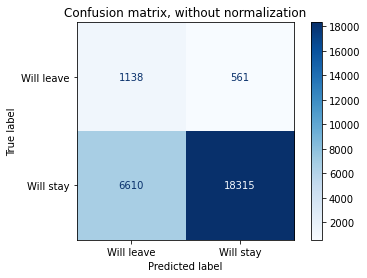

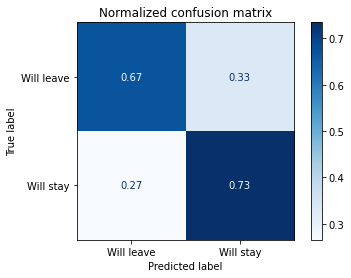

In [32]:
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=['Will leave', 'Will stay'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)


In [33]:
def confusion_marix(y_test, y_pred):
    titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_predictions(y_test,
                                                       y_pred,
                                                       display_labels=['Will leave', 'Will stay'],
                                                       normalize=normalize,
                                                       cmap=plt.cm.Blues)
        disp.ax_.set_title(title)
        plt.show()

# Different thresholds

threshold: 0.1
ROC: 0.5161


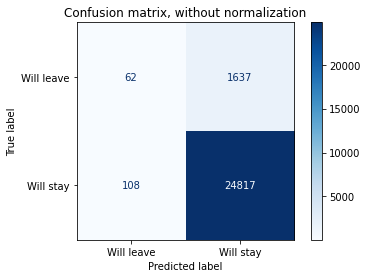

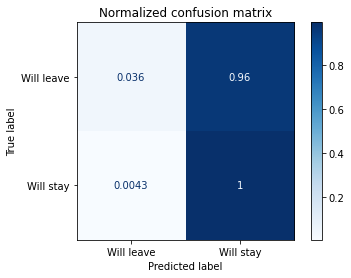

-----------------------------------------------------
threshold: 0.2
ROC: 0.5835


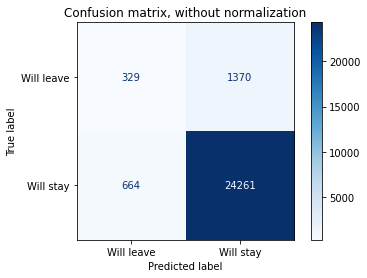

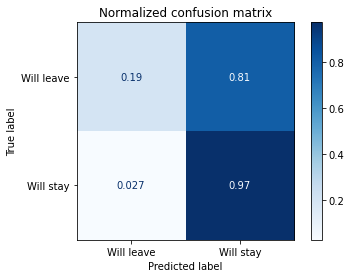

-----------------------------------------------------
threshold: 0.3
ROC: 0.6387


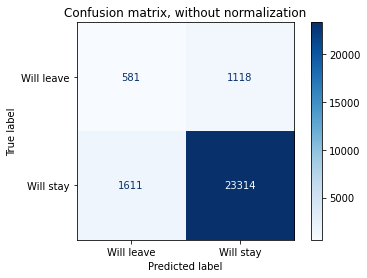

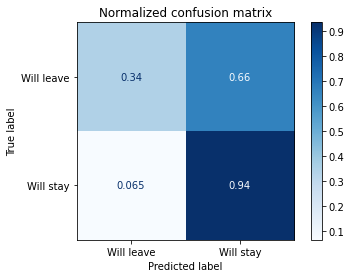

-----------------------------------------------------
threshold: 0.4
ROC: 0.6732


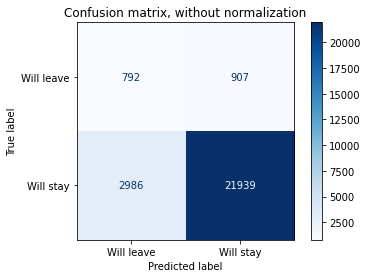

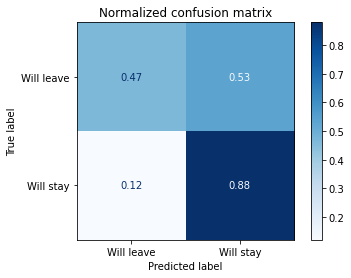

-----------------------------------------------------
threshold: 0.5
ROC: 0.7023


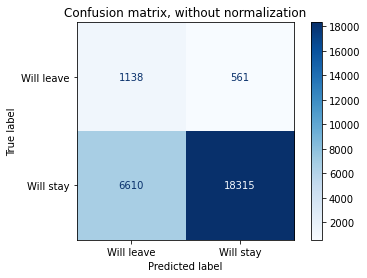

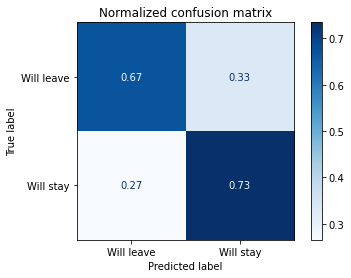

-----------------------------------------------------
threshold: 0.6
ROC: 0.6977


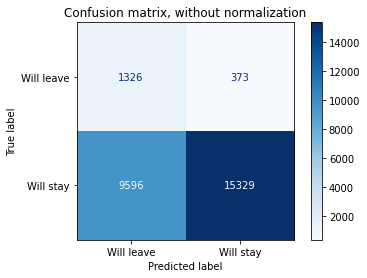

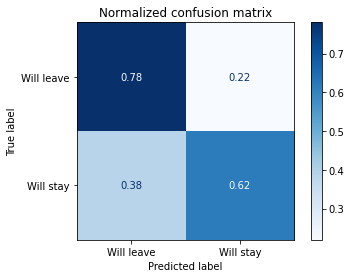

-----------------------------------------------------
threshold: 0.7
ROC: 0.6708


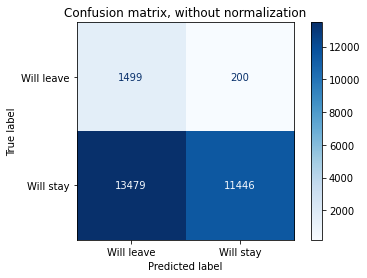

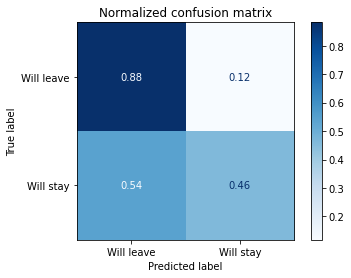

-----------------------------------------------------
threshold: 0.8
ROC: 0.618


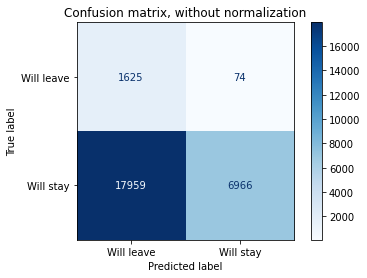

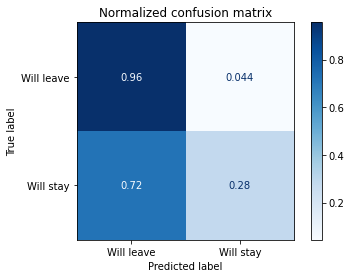

-----------------------------------------------------
threshold: 0.9
ROC: 0.5598


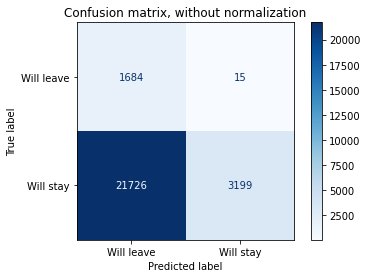

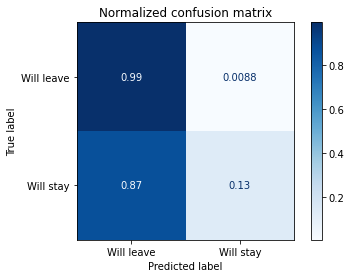

-----------------------------------------------------


In [34]:
for threshold in np.arange(0.1, 1, 0.1):
    threshold = round(threshold, 1)
    pred = model.predict_proba(X_test)[:, 1]
    pred = [(p >= threshold).astype('int') for p in pred]
    roc = round(roc_auc_score(y_test, pred), 4)
    print(f"threshold: {threshold}\nROC: {roc}")
    confusion_marix(y_test, pred)
    print("-" * 53)
    

In [35]:
for threshold in np.arange(0.1, 1, 0.1):
    threshold = round(threshold, 1)
    pred = model.predict_proba(X_test)[:, 1]
    pred = [(p >= threshold).astype('int') for p in pred]
    roc = round(roc_auc_score(y_test, pred), 4)
    print(f"threshold: {threshold}\nROC: {roc}")
    print(classification_report(y_test, pred))
    print("-" * 53)

threshold: 0.1
ROC: 0.5161
              precision    recall  f1-score   support

           0       0.36      0.04      0.07      1699
           1       0.94      1.00      0.97     24925

    accuracy                           0.93     26624
   macro avg       0.65      0.52      0.52     26624
weighted avg       0.90      0.93      0.91     26624

-----------------------------------------------------
threshold: 0.2
ROC: 0.5835
              precision    recall  f1-score   support

           0       0.33      0.19      0.24      1699
           1       0.95      0.97      0.96     24925

    accuracy                           0.92     26624
   macro avg       0.64      0.58      0.60     26624
weighted avg       0.91      0.92      0.91     26624

-----------------------------------------------------
threshold: 0.3
ROC: 0.6387
              precision    recall  f1-score   support

           0       0.27      0.34      0.30      1699
           1       0.95      0.94      0.94     

In [36]:
import shap
shap.initjs()

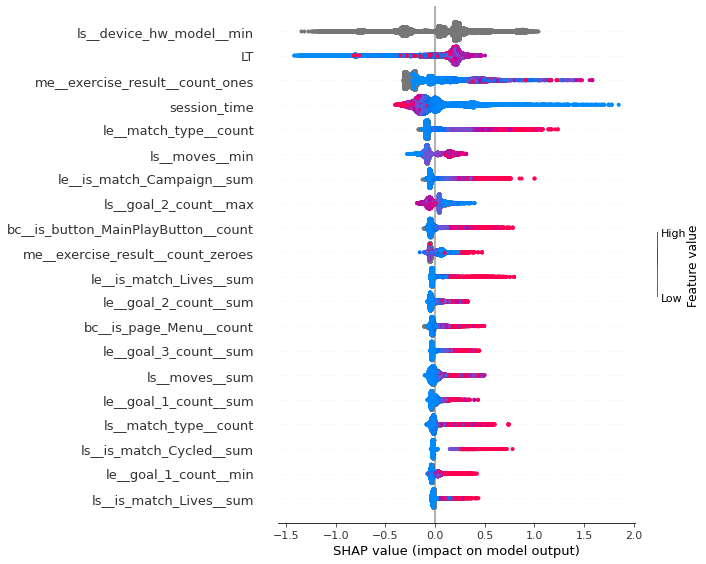

In [37]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Save model

In [38]:
model.save_model("../models/retention_catboost.bin")

In [39]:
# from_file = catboost.CatBoostClassifier()

# from_file.load_model("../../models/retention_catboost.bin")